<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model_24.07.2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [14]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Chelsea",
        7: "Chelsea",
        8: "Everton",
        9: "Fulham",
        10: "Ipswich Town",
        11: "Leicester City",
        12: "Liverpool",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Southampton",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            float(x["expected_goals"]),  # Convert to float
            float(x["expected_assists"]),  # Convert to float
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "expected_goals", "expected_assists", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [16]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
master = playerdata
#master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
#master['BPS90'] = master.bps/(master.minutes/90)
master

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
0,1,Arsenal,M,Fábio Vieira,5.5,0.1,1.25,0.64,1,3,67,25.5,24,2.2,290,2,3
1,2,Arsenal,F,G.Jesus,7.0,1.0,6.27,3.26,4,7,271,152.7,85,3.1,1470,2,3
2,3,Arsenal,D,Gabriel,6.0,12.8,4.48,0.65,3,1,676,117.9,149,4.1,3042,2,3
3,4,Arsenal,F,Havertz,8.0,14.1,12.36,3.88,13,10,515,240.2,180,4.9,2627,2,3
4,5,Arsenal,G,Hein,4.0,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,563,Wolverhampton Wanderers,M,R.Gomes,5.5,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
570,564,Wolverhampton Wanderers,D,S.Bueno,4.5,0.2,0.00,0.01,0,0,124,20.3,13,1.1,819,2,3
571,565,Wolverhampton Wanderers,M,Sarabia,5.5,0.4,5.52,5.00,4,7,358,168.4,99,3.3,1737,2,3
572,566,Wolverhampton Wanderers,F,Strand Larsen,5.5,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3


In [17]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw33 = homesawayspi.query('Event=="33.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw33['League_Average']  = laverage
gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw33['home_difference'] = gw33.HomeSPI - gw33.League_Average
gw33['away_difference'] = gw33.AwaySPI - gw33.League_Average


# Assuming gw33 is your DataFrame
gw33['home_adjustment'] = (gw33.home_difference + gw33.League_Average) / gw33.League_Average
gw33['away_adjustment'] = (gw33.away_difference + gw33.League_Average) / gw33.League_Average

# Creating DataFrame for home adjustments
home_adjustments = gw33[['team_h', 'home_adjustment']].rename(columns={'team_h': 'team'}).copy()

# Creating DataFrame for away adjustments
away_adjustments = gw33[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team'}).copy()

# Concatenating home and away adjustments
gw33adjustments = pd.concat([home_adjustments, away_adjustments], ignore_index=True)


<ipython-input-17-bcce1f8b2be0>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PLSPI['League Average']  = PLSPI["spi"].mean()
<ipython-input-17-bcce1f8b2be0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)


In [6]:
rawdf = pd.merge(master,
                     gw33adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.expected_goals * 4/32)+(rawfwd.expected_assists * 3/32) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.expected_goals * 5/32)+(rawmd.expected_assists * 3/32) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/32))/4
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
#rawgk['xP'] = rawgk.apppoint * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.expected_goals * 6/32)+(rawdef.expected_assists * 3/32) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
#rawdef['xP'] = ((rawdef.expected_goals * 6/3)+(rawdef.expected_assists * 3/3) + (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
 'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-6-66e6c57787b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwd['xP'] = ((rawfwd.expected_goals * 4/32)+(rawfwd.expected_assists * 3/32) + (rawfwd.apppoint)) * rawfwd.home_adjustment
<ipython-input-6-66e6c57787b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmd['xP'] = ((rawmd.expected_goals * 5/32)+(rawmd.expected_assists * 3/32) + (rawmd.apppoint)) * rawmd.home_adjustment
<ipython-input-6-66e6c57787b6>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,id,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,away_adjustment,xP,xCSP
0,2,F,G.Jesus,7.0,1.0,4,7,271,152.7,85,3.1,1470,NaN,NaN,NaN
1,4,F,Havertz,8.0,14.1,13,10,515,240.2,180,4.9,2627,NaN,NaN,NaN
2,11,F,Nketiah,6.0,0.4,5,4,206,77.2,71,2.6,1065,NaN,NaN,NaN
3,27,F,Archer,5.0,1.0,4,3,241,92.8,82,2.7,1829,NaN,NaN,NaN
4,38,F,Duran,6.0,0.3,5,1,162,40.2,50,2.2,461,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,521,G,Fabianski,4.0,7.5,0,0,152,24.6,24,2.4,721,NaN,NaN,-1.221875
570,522,G,Foderingham,4.5,0.3,0,0,531,97.7,70,2.3,2648,NaN,NaN,-1.221875
571,536,G,Bentley,4.0,1.0,0,0,73,7.1,18,3.6,382,NaN,NaN,-1.115625
572,554,G,José Sá,4.5,2.8,0,1,622,101.6,107,3.1,3037,NaN,NaN,-1.115625


In [7]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,1,Manchester United,Everton,2024-08-16T19:00:00Z
1,1,Fulham,Luton Town,2024-08-17T11:30:00Z
2,1,Arsenal,Wolverhampton Wanderers,2024-08-17T14:00:00Z
3,1,Crystal Palace,Brighton,2024-08-17T14:00:00Z
4,1,Newcastle United,Sheffield United,2024-08-17T14:00:00Z
...,...,...,...,...
375,38,Newcastle United,Crystal Palace,2025-05-25T15:00:00Z
376,38,Nottingham Forest,Burnley,2025-05-25T15:00:00Z
377,38,Sheffield United,Arsenal,2025-05-25T15:00:00Z
378,38,Tottenham,Brighton,2025-05-25T15:00:00Z


In [8]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,...,ict_index,points,points_per_game,minutes,apppoint,assistvalue,home_adjustment,away_adjustment,xGA,xCSP
4,5,Arsenal,G,Hein,4.0,0.2,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,NaN,NaN,27.9,0.128125
13,14,Arsenal,G,Ramsdale,4.5,0.9,0.0,0.01,0,0,...,7.3,20,3.3,540,2,3,NaN,NaN,27.9,0.128125
14,15,Arsenal,G,Raya,5.5,21.2,0.0,0.04,0,0,...,41.1,135,4.2,2880,2,3,NaN,NaN,27.9,0.128125
38,39,Aston Villa,G,Gauci,4.0,0.2,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,NaN,NaN,59.9,-0.871875
45,46,Aston Villa,G,Marschall,4.0,0.0,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,NaN,NaN,59.9,-0.871875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,521,West Ham,G,Fabianski,4.0,7.5,0.0,0.00,0,0,...,24.6,24,2.4,721,2,3,NaN,NaN,71.1,-1.221875
528,522,West Ham,G,Foderingham,4.5,0.3,0.0,0.05,0,0,...,97.7,70,2.3,2648,2,3,NaN,NaN,71.1,-1.221875
542,536,Wolverhampton Wanderers,G,Bentley,4.0,1.0,0.0,0.00,0,0,...,7.1,18,3.6,382,2,3,NaN,NaN,67.7,-1.115625
560,554,Wolverhampton Wanderers,G,José Sá,4.5,2.8,0.0,0.00,0,1,...,101.6,107,3.1,3037,2,3,NaN,NaN,67.7,-1.115625


In [9]:
from pandas import ExcelWriter

In [10]:
writer = ExcelWriter('notes.xlsx')

In [11]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw33adjustments.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [12]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,1,Manchester United,Everton,2024-08-16T19:00:00Z
1,1,Fulham,Luton Town,2024-08-17T11:30:00Z
2,1,Arsenal,Wolverhampton Wanderers,2024-08-17T14:00:00Z
3,1,Crystal Palace,Brighton,2024-08-17T14:00:00Z
4,1,Newcastle United,Sheffield United,2024-08-17T14:00:00Z
...,...,...,...,...
375,38,Newcastle United,Crystal Palace,2025-05-25T15:00:00Z
376,38,Nottingham Forest,Burnley,2025-05-25T15:00:00Z
377,38,Sheffield United,Arsenal,2025-05-25T15:00:00Z
378,38,Tottenham,Brighton,2025-05-25T15:00:00Z


In [13]:
rawdfallgw = pd.merge(master,
                     gw33adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/32)+(rawfwdallgw.expected_assists * 3/32) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/32)+(rawmdallgw.expected_assists * 3/32) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = ((4 - (epltabledef.xGA * 4/32))/4) + 0.75
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
#rawgkallgw['xPallgw'] = (rawgkallgw.apppoint)
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'expected_goals',
  'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/32)+(rawdefallgw.expected_assists * 3/32) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
#rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/3)+(rawdefallgw.expected_assists * 3/3) + (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-13-11093d9df021>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/32)+(rawfwdallgw.expected_assists * 3/32) + (rawfwdallgw.apppoint))
<ipython-input-13-11093d9df021>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/32)+(rawmdallgw.expected_assists * 3/32) + (rawmdallgw.apppoint))


KeyError: "['Last 5'] not found in axis"

In [ ]:
rawmdallgw

In [ ]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

In [ ]:
#gw2adjustments = pd.concat([gw2adjustments, blanks2])
#gw2adjustments = gw2adjustments.reset_index(drop=True)
#gw2adjustments

In [ ]:
##gw3blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]

# Create the pandas DataFrame
##blanks = pd.DataFrame(gw3blanks, columns=['team', 'gw3adjustment'])
##blanks

In [ ]:
gw33 = homesawayspi.query('Event=="33.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw33['League_Average']  = laverage
gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw33['home_difference'] = gw33.HomeSPI - gw33.League_Average
gw33['away_difference'] = gw33.AwaySPI - gw33.League_Average
gw33['home_adjustment'] = (gw33.home_difference - gw33.away_difference + gw33.League_Average)/gw33.League_Average
gw33['away_adjustment'] = (gw33.away_difference - gw33.home_difference+ gw33.League_Average)/gw33.League_Average
gw33adjustments = pd.concat([gw33[['team_h', 'home_adjustment']], gw33[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw33adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw33adjustments.rename(columns = {'home_adjustment':'gw33adjustment'}, inplace = True)
gw33adjustments

In [ ]:
gw34 = homesawayspi.query('Event=="34.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw34['League_Average']  = laverage
gw34.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw34['home_difference'] = gw34.HomeSPI - gw34.League_Average
gw34['away_difference'] = gw34.AwaySPI - gw34.League_Average
gw34['home_adjustment'] = (gw34.home_difference - gw34.away_difference + gw34.League_Average)/gw34.League_Average
gw34['away_adjustment'] = (gw34.away_difference - gw34.home_difference+ gw34.League_Average)/gw34.League_Average
gw34adjustments = pd.concat([gw34[['team_h', 'home_adjustment']], gw34[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw34adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw34adjustments.rename(columns = {'home_adjustment':'gw34adjustment'}, inplace = True)
gw34adjustments = gw34adjustments.groupby('team', as_index=False)['gw34adjustment'].aggregate('sum')
gw34adjustments

In [ ]:
gw34blanks = [['Tottenham', 0]]

# Create the pandas DataFrame
blanks34 = pd.DataFrame(gw34blanks, columns=['team', 'gw34adjustment'])
blanks34

In [ ]:
gw34adjustments = pd.concat([gw34adjustments, blanks34])
gw34adjustments = gw34adjustments.reset_index(drop=True)
gw34adjustments

In [ ]:
gw35 = homesawayspi.query('Event=="35.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw35['League_Average']  = laverage
gw35.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw35['home_difference'] = gw35.HomeSPI - gw35.League_Average
gw35['away_difference'] = gw35.AwaySPI - gw35.League_Average
gw35['home_adjustment'] = (gw35.home_difference - gw35.away_difference + gw35.League_Average)/gw35.League_Average
gw35['away_adjustment'] = (gw35.away_difference - gw35.home_difference+ gw35.League_Average)/gw35.League_Average
gw35adjustments = pd.concat([gw35[['team_h', 'home_adjustment']], gw35[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw35adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw35adjustments.rename(columns = {'home_adjustment':'gw35adjustment'}, inplace = True)
gw35adjustments = gw35adjustments.groupby('team', as_index=False)['gw35adjustment'].aggregate('sum')
gw35adjustments

In [ ]:
gw26blanks = [['Chelsea', 0], ['Liverpool', 0], ['Nottingham Forest', 0], ['Tottenham', 0]]

blanks26 = pd.DataFrame(gw26blanks, columns=['team', 'gw26adjustment'])
blanks26

In [ ]:
gw36 = homesawayspi.query('Event=="36.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw36['League_Average']  = laverage
gw36.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw36['home_difference'] = gw36.HomeSPI - gw36.League_Average
gw36['away_difference'] = gw36.AwaySPI - gw36.League_Average
gw36['home_adjustment'] = (gw36.home_difference - gw36.away_difference + gw36.League_Average)/gw36.League_Average
gw36['away_adjustment'] = (gw36.away_difference - gw36.home_difference+ gw36.League_Average)/gw36.League_Average
gw36adjustments = pd.concat([gw36[['team_h', 'home_adjustment']], gw36[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw36adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw36adjustments.rename(columns = {'home_adjustment':'gw36adjustment'}, inplace = True)
gw36adjustments = gw36adjustments.groupby('team', as_index=False)['gw36adjustment'].aggregate('sum')
gw36adjustments

In [ ]:
gw26adjustments = pd.concat([gw26adjustments, blanks26])
gw26adjustments = gw26adjustments.reset_index(drop=True)
gw26adjustments

In [ ]:
gw37 = homesawayspi.query('Event=="37.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw37['League_Average']  = laverage
gw37.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw37['home_difference'] = gw37.HomeSPI - gw37.League_Average
gw37['away_difference'] = gw37.AwaySPI - gw37.League_Average
gw37['home_adjustment'] = (gw37.home_difference - gw37.away_difference + gw37.League_Average)/gw37.League_Average
gw37['away_adjustment'] = (gw37.away_difference - gw37.home_difference+ gw37.League_Average)/gw37.League_Average
gw37adjustments = pd.concat([gw37[['team_h', 'home_adjustment']], gw37[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw37adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw37adjustments.rename(columns = {'home_adjustment':'gw37adjustment'}, inplace = True)
gw37adjustments = gw37adjustments.groupby('team', as_index=False)['gw37adjustment'].aggregate('sum')
gw37adjustments

In [ ]:
gw38 = homesawayspi.query('Event=="38.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw38['League_Average']  = laverage
gw38.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw38['home_difference'] = gw38.HomeSPI - gw38.League_Average
gw38['away_difference'] = gw38.AwaySPI - gw38.League_Average
gw38['home_adjustment'] = (gw38.home_difference - gw38.away_difference + gw38.League_Average)/gw38.League_Average
gw38['away_adjustment'] = (gw38.away_difference - gw38.home_difference+ gw38.League_Average)/gw38.League_Average
gw38adjustments = pd.concat([gw38[['team_h', 'home_adjustment']], gw38[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw38adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw38adjustments.rename(columns = {'home_adjustment':'gw38adjustment'}, inplace = True)
gw38adjustments = gw38adjustments.groupby('team', as_index=False)['gw38adjustment'].aggregate('sum')
gw38adjustments

In [ ]:
gw18blanks = [['Brentford', 0], ['Manchester City', 0]]

# Create the pandas DataFrame
blanks18 = pd.DataFrame(gw18blanks, columns=['team', 'gw18adjustment'])
blanks18

In [ ]:
#gw18adjustments = pd.concat([gw18adjustments, blanks18])
#gw18adjustments = gw18adjustments.reset_index(drop=True)
#gw18adjustments

In [ ]:
gwadjustments3337 = pd.merge(gw33adjustments,gw34adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw35adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw36adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw37adjustments, on ='team')
gwadjustments3337

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gwadjustments2428 is your dataframe containing the data

# Set 'team' column as index
gwadjustments337.set_index('team', inplace=True)

# Transpose the dataframe
df_transposed = gwadjustments2529.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for team in df_transposed.columns:
    ax.plot(df_transposed.index.str.replace('gw', ''), df_transposed[team], label=team)

# Customizing the plot
ax.set_title('Adjustments by Team')
ax.set_xlabel('Gameweek')
ax.set_ylabel('Adjustment Value')
ax.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments3337,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw14adjustment_y':'gw14adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

In [ ]:
#gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
#gw3adjustments

In [ ]:
rawdfgw228x['gw33'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw33adjustment)+2)
rawdfgw228x['gw34'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw34adjustment)+2)
rawdfgw228x['gw35'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw35adjustment)+2)
rawdfgw228x['gw36'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw36adjustment)+2)
rawdfgw228x['gw37'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw37adjustment)+2)

rawdfgw228x['5GW Total'] = rawdfgw228x.gw33 + rawdfgw228x.gw34 + rawdfgw228x.gw35 + rawdfgw228x.gw36 + rawdfgw228x.gw37
rawdfgw228x['3GW Total'] = rawdfgw228x.gw33 + rawdfgw228x.gw34 + rawdfgw228x.gw35
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw33adjustment',
  'gw34adjustment',
  'gw35adjustment',
  'gw36adjustment',
  'gw37adjustment'
  ])
rawdfgw228x

In [ ]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments3337.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import shutil

In [ ]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [ ]:
rawdfgw228x.nlargest(50, '5GW Total')

In [ ]:
rawdfgw228x.nlargest(50, '3GW Total')

In [ ]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Plotting the scatter plots
plt.figure(figsize=(18, 6))

# Midfielders scatter plot
plt.subplot(131)
plt.scatter(midfielders['cost'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in midfielders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Forwards scatter plot
plt.subplot(132)
plt.scatter(forwards['cost'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in forwards.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Defenders scatter plot
plt.subplot(133)
plt.scatter(defenders['cost'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in defenders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

plt.tight_layout()
plt.show()


In [ ]:
rawdfgw228x

In [ ]:
apiplayers = master

In [ ]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

In [ ]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [20]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/21))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Manchester City,38,28,7,3,96,34,62,91,2.39,80.5,35.6,44.9,1.18,-2.780952,2.118421,0.936842
1,2,Arsenal,38,28,5,5,91,29,62,89,2.34,76.1,27.9,48.2,1.27,-1.314286,2.002632,0.734211
2,3,Liverpool,38,24,10,4,86,41,45,82,2.16,87.8,45.7,42.0,1.11,-4.704762,2.310526,1.202632
3,4,Aston Villa,38,20,8,10,76,61,15,68,1.79,63.3,59.9,3.4,0.09,-7.409524,1.665789,1.576316
4,5,Tottenham,38,20,6,12,74,61,13,66,1.74,68.2,63.4,4.8,0.13,-8.076190,1.794737,1.668421
5,6,Chelsea,38,18,9,11,77,63,14,63,1.66,74.5,58.1,16.4,0.43,-7.066667,1.960526,1.528947
6,7,Newcastle United,38,18,6,14,85,62,23,60,1.58,76.0,61.4,14.6,0.38,-7.695238,2.000000,1.615789
7,8,Manchester United,38,18,6,14,57,58,-1,60,1.58,56.5,68.9,-12.5,-0.33,-9.123810,1.486842,1.813158
8,9,West Ham,38,14,10,14,60,74,-14,52,1.37,52.3,71.1,-18.8,-0.49,-9.542857,1.376316,1.871053
9,10,Crystal Palace,38,13,10,15,57,58,-1,49,1.29,48.6,52.0,-3.4,-0.09,-5.904762,1.278947,1.368421


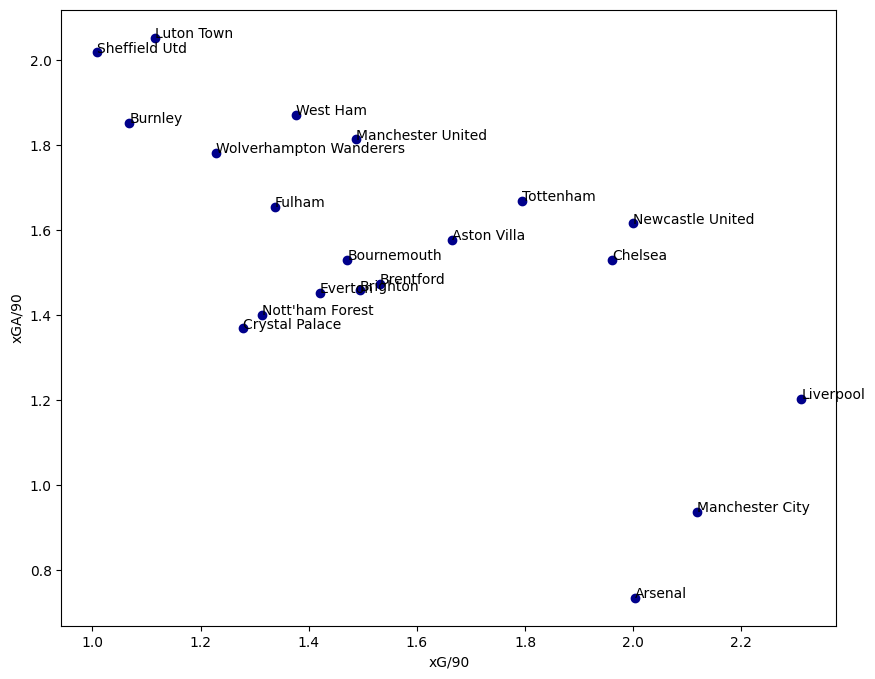

In [21]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [ ]:
EPL_player_df

In [ ]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

In [ ]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [ ]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [ ]:
top25assists.columns

In [ ]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

In [ ]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xA",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Midfielders chart
plt.subplot(131)
plt.bar(midfielders['name'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xticks(rotation=45)

# Forwards chart
plt.subplot(132)
plt.bar(forwards['name'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xticks(rotation=45)

# Defenders chart
plt.subplot(133)
plt.bar(defenders['name'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Create a list of colors for each chart
colors = ['blue', 'green', 'red']

# Plotting the horizontal bar charts with different colors
plt.figure(figsize=(10, 6))

# Midfielders chart
plt.barh(midfielders['name'][:10], midfielders['5GW Total'][:10], color=colors[0])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Forwards chart
plt.figure(figsize=(10, 6))
plt.barh(forwards['name'][:10], forwards['5GW Total'][:10], color=colors[1])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Defenders chart
plt.figure(figsize=(10, 6))
plt.barh(defenders['name'][:10], defenders['5GW Total'][:10], color=colors[2])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Sort the DataFrame by values in descending order
gw25adjustments_sorted = gw25adjustments.sort_values(by=gw25adjustments.columns[0], ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(gw25adjustments_sorted, annot=True, cmap=custom_cmap, center=1,
            vmin=0.9, vmax=1.1, cbar_kws={'ticks': [0.9, 1, 1.1], 'format': '%.1f'})
plt.title('Color-Coded Table of GW Adjustments (Custom Colors)')
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments21'

# Sort the DataFrame by values in descending order
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

scores_columns = ['gw21adjustment', 'gw22adjustment', 'gw23adjustment', 'gw24adjustment', 'gw25adjustment']

bottom = [0] * len(gw21adjustments_sorted)

for i, score_col in enumerate(scores_columns):
    plt.bar(gw21adjustments_sorted.index, gw21adjustments_sorted[score_col], bottom=bottom, label=score_col, color=custom_cmap[i])
    bottom += gw21adjustments_sorted[score_col]

plt.xlabel('Teams')
plt.ylabel('Score Adjustments')
plt.title('Stacked GW Adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate the total score adjustments for each team
gw21adjustments['Total'] = gw21adjustments.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gw21adjustments = gw21adjustments.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw22adjustments', 'gw23adjustments', 'gw24adjustments', 'gw25adjustments']

bottom = [0] * len(gw21adjustments)

for score_col in scores_columns:
    plt.bar(gw21adjustments.index, gw21adjustments[score_col], bottom=bottom, label=score_col)
    bottom += gw21adjustments[score_col]

plt.xlabel('Teams')
plt.ylabel('Score adjustments')
plt.title('Stacked GW adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
gw23adjustment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Set the index column
gwadjustments26.set_index('team', inplace=True)

# Create a custom color map
cmap = sns.diverging_palette(240, 10, n=21, as_cmap=True)
colors = ['red', 'orange', 'green']

# Define color thresholds
color_thresholds = [0.9, 1.1, 2.0]

# Normalize values for coloring
normalized_values = (gwadjustments26 - 0.9) / (2.0 - 0.9)

# Apply color map and thresholds
colored_values = pd.cut(normalized_values, bins=color_thresholds, labels=colors)

# Plot the heatmap with customized color coding
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_values, annot=True, cmap=cmap, center=1, cbar=False, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Custom Color-Coded Table of GW Adjustments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

# Calculate the total score adjustments for each team
gwadjustments26['Total'] = gwadjustments26.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gwadjustments26 = gwadjustments26.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw2adjustment', 'gw3adjustment', 'gw4adjustment', 'gw5adjustment', 'gw6adjustment']

# Define color thresholds and corresponding colors
color_thresholds = [0.9, 1.1, 2.0]
colors = ['red', 'orange', 'green']

bottom = [0] * len(gwadjustments26)

for score_col in scores_columns:
    adjusted_values = gwadjustments26[score_col]

    # Create a color list based on thresholds
    colors_for_col = [colors[-1] if val is None else
                      colors[0] if val < color_thresholds[0] else
                      colors[1] if val <= color_thresholds[1] else
                      colors[2]
                      for val in adjusted_values]

    for i, (val, color) in enumerate(zip(adjusted_values, colors_for_col)):
        plt.barh(gwadjustments26.index[i], val, color=color, edgecolor='white')

    bottom += adjusted_values

plt.xlabel('Score Adjustments')
plt.ylabel('Teams')
plt.title('Horizontally Stacked GW Adjustments for Different Teams')
plt.legend(labels=scores_columns)
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()


In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Chelsea",
        7: "Chelsea",
        8: "Everton",
        9: "Fulham",
        10: "Ipswich Town",
        11: "Leicester City",
        12: "Liverpool",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Southampton",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 6388102
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()



In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 275269
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()


In [22]:
import pandas as pd

fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc = epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc = epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc = epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc = epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc = epltablexGxGc.replace('Manchester Utd','Manchester United')

epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc = epltablexGxGc.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the new dataframe "XGD current season"
xgd_current_season = epltablexGxGc[['Team', 'xGD']]

# Displaying the new dataframe
xgd_current_season

,Team,xGD
0,Manchester City,44.9
1,Arsenal,48.2
2,Liverpool,42.0
3,Aston Villa,3.4
4,Tottenham,4.8
5,Chelsea,16.4
6,Newcastle United,14.6
7,Manchester United,-12.5
8,West Ham,-18.8
9,Crystal Palace,-3.4


In [23]:
import pandas as pd

# Fetching data for XGD current season
fbref_current_season = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable_current_season = fbref_current_season[0]
epltablexGxGc_current_season = epltable_current_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leeds United','Leeds')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leicester City','Leicester')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_current_season['Squad'] = epltablexGxGc_current_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_current_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD current season dataframe
xgd_current_season = epltablexGxGc_current_season[['Team', 'xGD/90']]

# Fetching data for XGD Last season
fbref_last_season = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')
epltable_last_season = fbref_last_season[0]
epltablexGxGc_last_season = epltable_last_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leeds United','Leeds')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leicester City','Leicester')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_last_season['Squad'] = epltablexGxGc_last_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_last_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD Last season dataframe
xgd_last_season = epltablexGxGc_last_season[['Team', 'xGD/90']]

# Merging the two dataframes
merged_df = pd.merge(xgd_current_season, xgd_last_season, on='Team', suffixes=('_current', '_last'), how='outer')
merged_df.fillna(0, inplace=True)

# Displaying the merged dataframe
merged_df_filtered = merged_df.copy()

# Drop rows containing "Leicester", "Leeds", and "Southampton" from the filtered DataFrame
merged_df_filtered = merged_df_filtered[~merged_df_filtered['Team'].isin(['Leicester', 'Leeds', 'Southampton'])]
merged_df_filtered

,Team,xGD/90_current,xGD/90_last
0,Manchester City,1.18,1.22
1,Arsenal,1.27,0.78
2,Liverpool,1.11,0.55
3,Aston Villa,0.09,-0.06
4,Tottenham,0.13,0.20
5,Chelsea,0.43,-0.08
6,Newcastle United,0.38,0.85
7,Manchester United,-0.33,0.45
8,West Ham,-0.49,-0.10
9,Crystal Palace,-0.09,-0.23


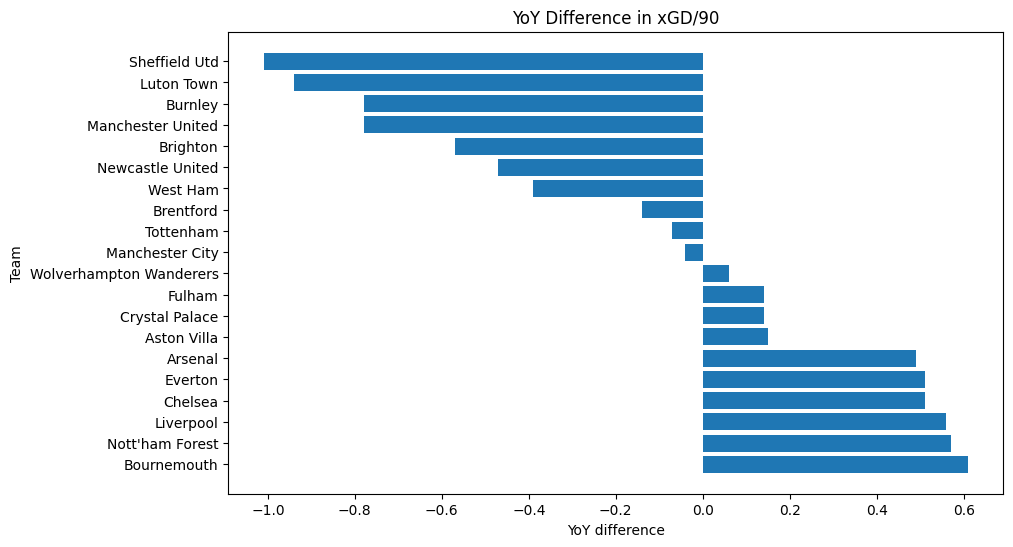

In [24]:
import matplotlib.pyplot as plt

# Create the YoY difference column
merged_df_filtered['YoY difference'] = merged_df_filtered['xGD/90_current'] - merged_df_filtered['xGD/90_last']

# Sort the DataFrame by YoY difference in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('YoY difference', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['YoY difference'])
plt.xlabel('YoY difference')
plt.ylabel('Team')
plt.title('YoY Difference in xGD/90')
plt.show()

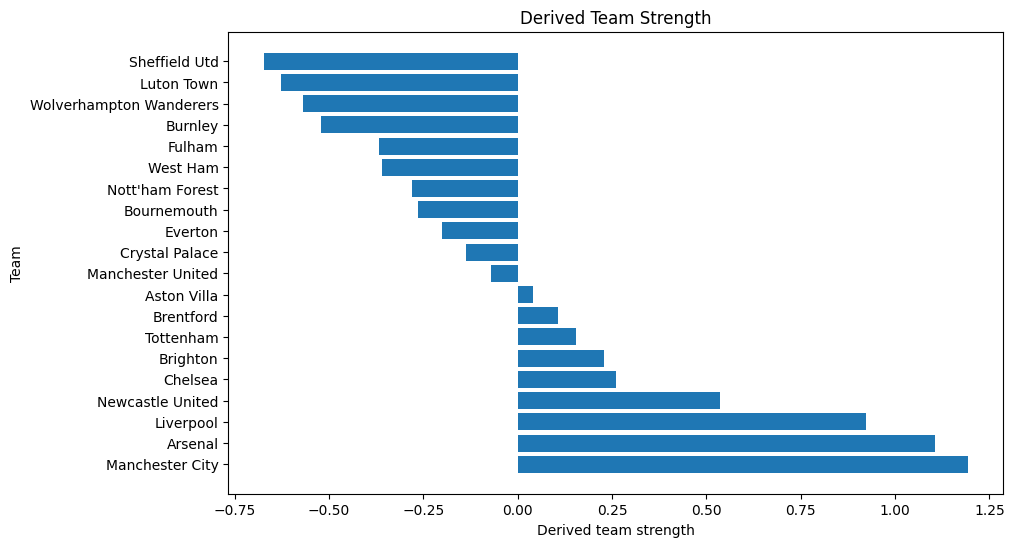

In [25]:
import matplotlib.pyplot as plt

# Create the Derived team strength column
merged_df_filtered['Derived team strength'] = (2/3) * merged_df_filtered['xGD/90_current'] + (1/3) * merged_df_filtered['xGD/90_last']

# Sort the DataFrame by Derived team strength in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('Derived team strength', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['Derived team strength'])
plt.xlabel('Derived team strength')
plt.ylabel('Team')
plt.title('Derived Team Strength')
plt.show()

In [26]:
merged_df_filtered

,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Manchester City,1.18,1.22,-0.04,1.193333
1,Arsenal,1.27,0.78,0.49,1.106667
2,Liverpool,1.11,0.55,0.56,0.923333
3,Aston Villa,0.09,-0.06,0.15,0.040000
4,Tottenham,0.13,0.20,-0.07,0.153333
5,Chelsea,0.43,-0.08,0.51,0.260000
6,Newcastle United,0.38,0.85,-0.47,0.536667
7,Manchester United,-0.33,0.45,-0.78,-0.070000
8,West Ham,-0.49,-0.10,-0.39,-0.360000
9,Crystal Palace,-0.09,-0.23,0.14,-0.136667


In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    return(player_df)

#Creprint('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Merging Tables')
EPL_player_df = pd.merge(five_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


# Assuming you have a DataFrame named EPL_player_df

# Extract relevant columns
selected_columns = ['player_name', 'xG_5wks_x', 'xA_5wks_x']
subset_df = EPL_player_df[selected_columns]

# Rename columns
subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)

# Round the numbers to 2 decimal places
subset_df = subset_df.round(2)

# Sort by xG 5 Weeks in descending order
top_10_xG = subset_df.sort_values(by='xG 5 Weeks', ascending=False).head(10)

# Sort by xA 5 Weeks in descending order
top_10_xA = subset_df.sort_values(by='xA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 for xG 5 Weeks:")
print(top_10_xG)

# Display the top 10 for xA 5 Weeks
print("\nTop 10 for xA 5 Weeks:")
print(top_10_xA)



Getting data for the whole season
Getting data for last 5 matches
Getting data for the whole season
Getting data for last 5 matches
Merging Tables
Writing CSV File
Top 10 for xG 5 Weeks:
              player_name          xG 5 Weeks           xA 5 Weeks
1          Erling Haaland   6.369228810071945  0.08303657174110413
5          Alexander Isak   5.446970373392105   1.2436821945011616
24             Chris Wood  5.2017006278038025  0.08890415728092194
8         Nicolas Jackson  3.6765346229076385   0.5552143417298794
54          Mohamed Salah  3.5566647686064243    1.238892138004303
4             Kai Havertz  3.4393191039562225     2.44100783392787
0    Jean-Philippe Mateta  3.4231102764606476   0.5794218368828297
88             João Pedro   3.403755657374859   1.8018942037597299
463       Brennan Johnson  2.8884106278419495    2.125036910176277
33            Bukayo Saka   2.770745724439621    2.150390550494194

Top 10 for xA 5 Weeks:
         player_name          xG 5 Weeks          xA

<ipython-input-27-84b27e462036>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)


In [29]:
import pandas as pd

# Your list of values
values = [0.91, 0.326666667, 1.073333333, 0.93, 0.08, -0.286666667, 0.383333333, 0.036666667, 0.476666667, 0.326666667, -0.416666667, -0.376666667, -0.486666667, -0.21, -0.453333333, 0.32, -0.1, -0.68, -0.566666667, -0.786666667]

# Update the existing dataframe
merged_df_filtered['Derived team strength'] = values

# Set the desired range
new_min = 0.5
new_max = 1.5

# Scale the values
min_value = merged_df_filtered['Derived team strength'].min()
max_value = merged_df_filtered['Derived team strength'].max()

merged_df_filtered['Derived team strength'] = ((merged_df_filtered['Derived team strength'] - min_value) * (new_max - new_min) / (max_value - min_value)) + new_min

# Display the updated dataframe
merged_df_filtered


,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Manchester City,1.18,1.22,-0.04,1.412186
1,Arsenal,1.27,0.78,0.49,1.098566
2,Liverpool,1.11,0.55,0.56,1.500000
3,Aston Villa,0.09,-0.06,0.15,1.422939
4,Tottenham,0.13,0.20,-0.07,0.965950
5,Chelsea,0.43,-0.08,0.51,0.768817
6,Newcastle United,0.38,0.85,-0.47,1.129032
7,Manchester United,-0.33,0.45,-0.78,0.942652
8,West Ham,-0.49,-0.10,-0.39,1.179211
9,Crystal Palace,-0.09,-0.23,0.14,1.098566
